# Problema 1

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.api.types import is_numeric_dtype

table = pd.read_csv('data/employees.csv', delimiter=',', header='infer')
print("Numarul de angajati este: {}".format(table.shape[0]))
print("Numarul informatiilor despre fiecare angajat este: {}".format(table.shape[1]))
print("Informatiile despre angajati sunt: {}".format(table.columns))
complete_employees = table[table.notnull().all(axis=1)].dropna(axis=1, how='any').dropna(axis=0, how='any')
print("Numarul de angajati cu date complete: {}".format(complete_employees.shape[0]))
for prop in table.columns:
    if not is_numeric_dtype(table[prop][0]):
        print("Propietatea {}".format(prop))
        a = table.groupby(prop).count()
        b = table[prop].unique()
        print("Numarul de posibilitati {}".format(a.shape[0]))
        print("Numarul de posibilitati {}".format(b.shape[0]),
              end='\n--------------------------------------------------------------\n')
    else:
        print("Minimul pentru propietatea {} este {}\nMaximul este {}\nMedia este {}".format(
            prop,
            table[prop].min(),
            table[prop].max(),
            table[prop].mean()
        ), end='\n--------------------------------------------------------------\n')

print("Sunt valori lipsa: {}".format(table[table.isnull().any(axis=1)].shape[0] != 0))
print(table)

Numarul de angajati este: 1000
Numarul informatiilor despre fiecare angajat este: 8
Informatiile despre angajati sunt: Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')
Numarul de angajati cu date complete: 764
Propietatea First Name
Numarul de posibilitati 200
Numarul de posibilitati 201
--------------------------------------------------------------
Propietatea Gender
Numarul de posibilitati 2
Numarul de posibilitati 3
--------------------------------------------------------------
Propietatea Start Date
Numarul de posibilitati 972
Numarul de posibilitati 972
--------------------------------------------------------------
Propietatea Last Login Time
Numarul de posibilitati 720
Numarul de posibilitati 720
--------------------------------------------------------------
Minimul pentru propietatea Salary este 3
Maximul este 999999
Media este 91109.394
------------------------------------------------

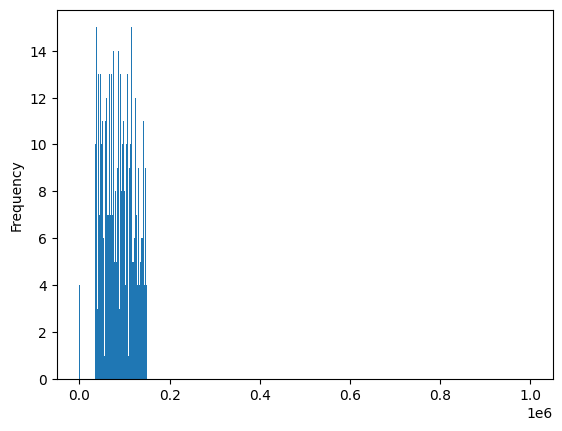

In [2]:
complete_employees['Salary'].plot(kind='hist', bins=complete_employees['Salary'].nunique())

plt.show()
# complete_employees['Team'].value_counts().plot(kind='hist', bins=complete_employees['Team'].nunique())

<Axes: ylabel='Frequency'>

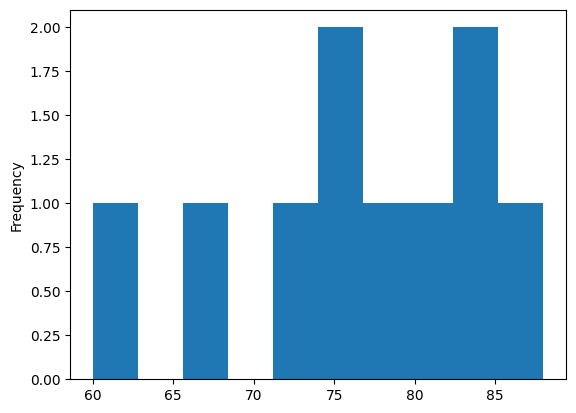

In [3]:
complete_employees['Team'].value_counts().plot(kind='hist', bins=complete_employees['Team'].nunique())

<Axes: ylabel='Frequency'>

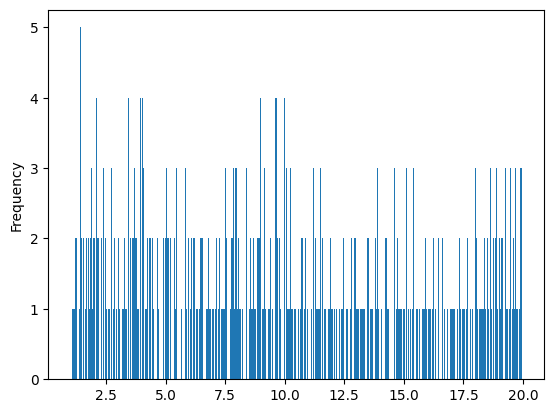

In [4]:
complete_employees['Bonus %'].plot(kind='hist', bins=complete_employees['Bonus %'].nunique())

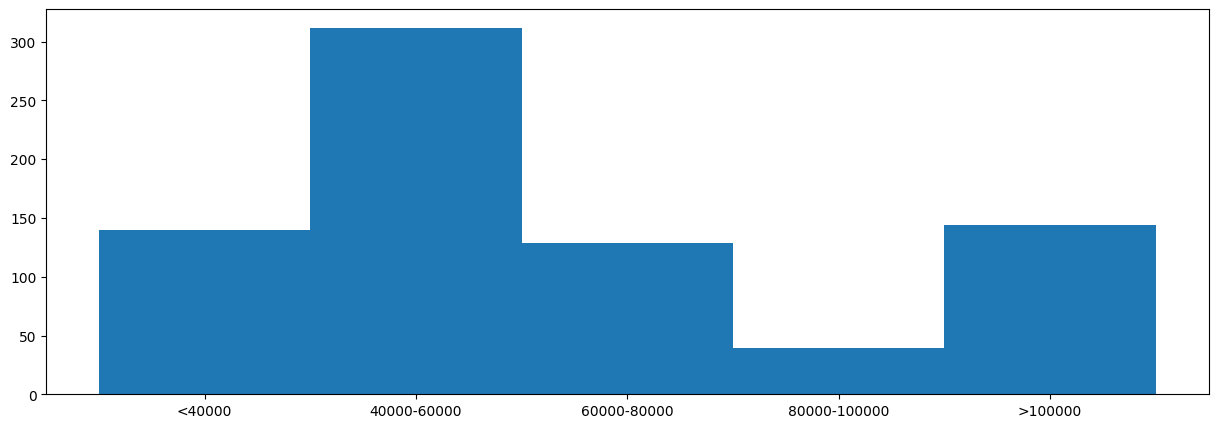

In [5]:
fig = plt.figure(figsize=(15, 5))
salary = complete_employees.copy(deep=True)
cat_salary = pd.cut(salary.Salary, bins=[0, 40000, 60000, 80000, 100000, np.inf], right=False, include_lowest=True,
                    labels=['<40000', '40000-60000', '60000-80000', '80000-100000', '>100000'])

# Count the occurrences of each category
counts = cat_salary.value_counts()

# Define the bins manually
bins = np.arange(len(counts) + 1)

plt.hist(cat_salary, bins=bins - 0.5, align='mid')  # Centering bins

plt.xticks(
    np.arange(len(counts)),
    ['<40000', '40000-60000', '60000-80000', '80000-100000', '>100000'],
    rotation=0,
    ha='center'
)
plt.show()


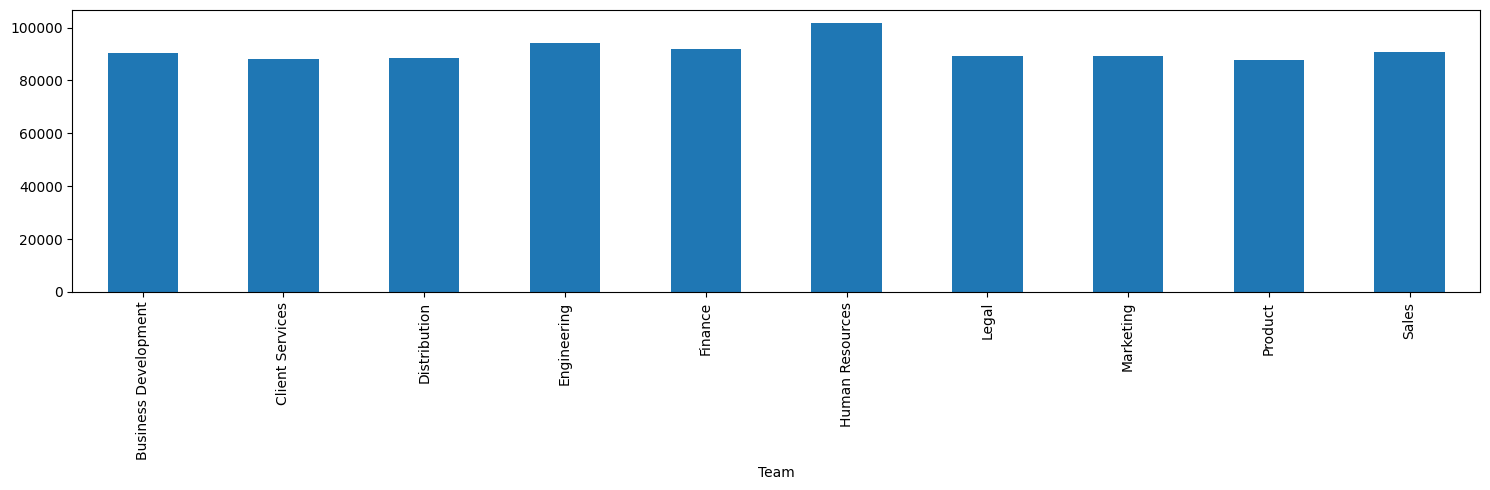

In [6]:
_, ax = plt.subplots(figsize=(15, 5))
s = table.copy(deep=True)
s.groupby('Team')['Salary'].mean().plot(kind='bar', ax=ax)

plt.xlabel('Team')
plt.tight_layout()
plt.show()

    First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male   8/6/1993        12:42 PM   97308    6.945   
2        Maria  Female  4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male   3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male  1/24/1998         4:47 PM  101004    1.389   
5       Dennis    Male  4/18/1987         1:35 AM  115163   10.125   
..         ...     ...        ...             ...     ...      ...   
994     George    Male  6/21/2013         5:47 PM   98874    4.479   
996    Phillip    Male  1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male  5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male  4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male  5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
2               False               Finance  
3                True

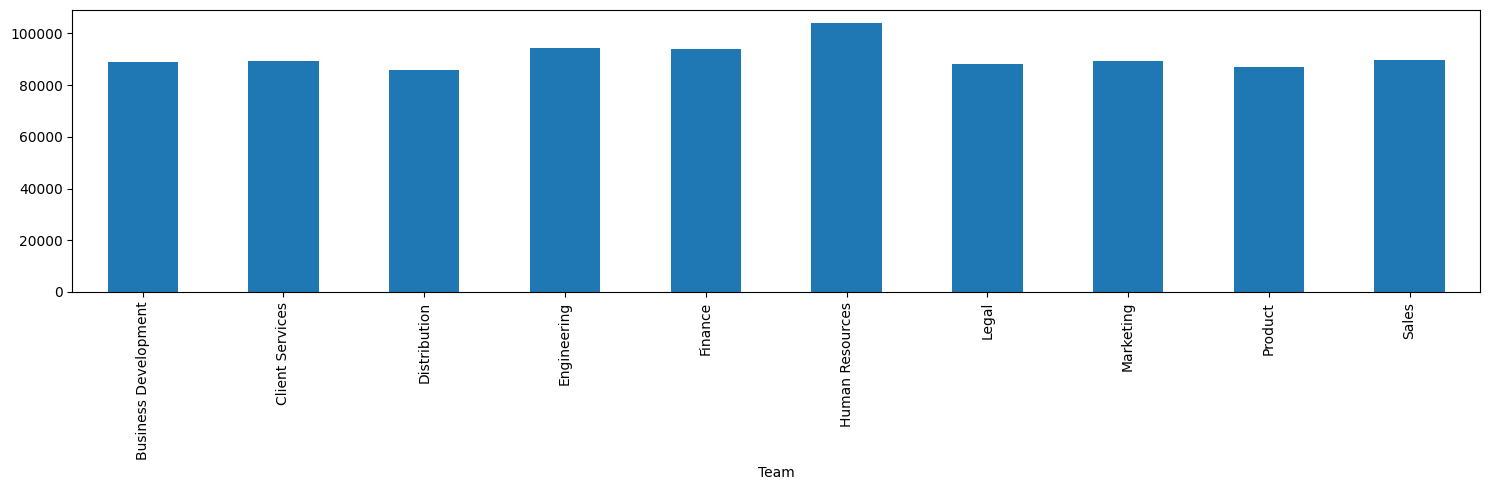

In [7]:
print(salary)

_, ax = plt.subplots(figsize=(15, 5))
salary = complete_employees.copy(deep=True)
salary.groupby('Team')['Salary'].mean().plot(kind='bar', ax=ax)

plt.xlabel('Team')
plt.tight_layout()
plt.show()

In [8]:
salary = complete_employees.copy(deep=True)
print(salary)
a = salary.Salary.describe().loc['75%']
b = salary.Salary.describe().loc['25%']
diff = a - b
lower_limit = b - 1.5 * diff
upper_limit = a + 1.5 * diff
outliers = salary[(salary.Salary < lower_limit) | (salary.Salary > upper_limit)]
print(outliers)

    First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male   8/6/1993        12:42 PM   97308    6.945   
2        Maria  Female  4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male   3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male  1/24/1998         4:47 PM  101004    1.389   
5       Dennis    Male  4/18/1987         1:35 AM  115163   10.125   
..         ...     ...        ...             ...     ...      ...   
994     George    Male  6/21/2013         5:47 PM   98874    4.479   
996    Phillip    Male  1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male  5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male  4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male  5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
2               False               Finance  
3                True

# Normalizarea datelor

<Axes: ylabel='Frequency'>

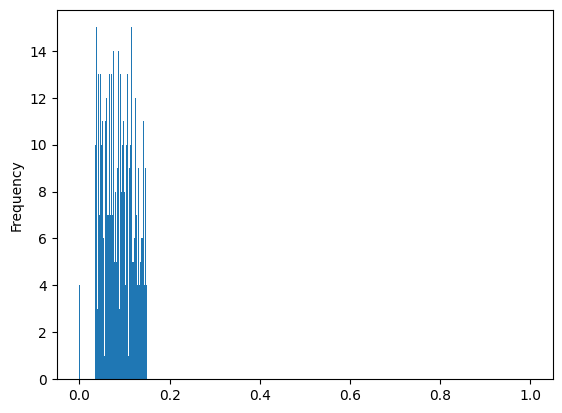

In [9]:
complete_employees['Salary'] = (complete_employees['Salary'] - complete_employees['Salary'].min()) / (complete_employees['Salary'].max() - complete_employees['Salary'].min())
complete_employees['Salary'].plot(kind='hist', bins=complete_employees['Salary'].nunique())

<Axes: ylabel='Frequency'>

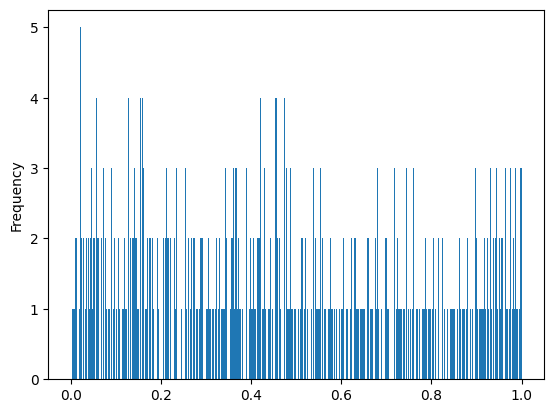

In [10]:
complete_employees['Bonus %'] = (complete_employees['Bonus %'] - complete_employees['Bonus %'].min()) / (complete_employees['Bonus %'].max() - complete_employees['Bonus %'].min())
complete_employees['Bonus %'].plot(kind='hist', bins=complete_employees['Bonus %'].nunique())

<Axes: ylabel='Frequency'>

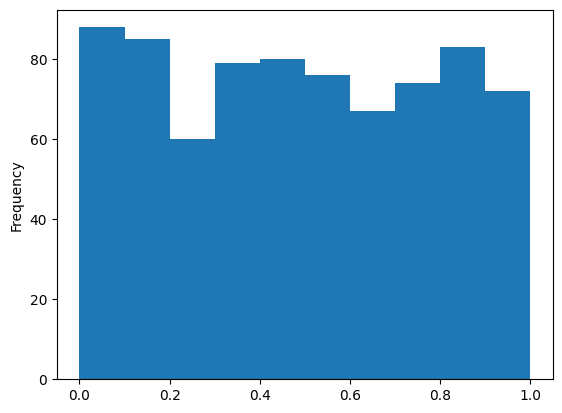

In [51]:
complete_employees['Normalized Team'] = pd.Categorical(complete_employees['Team']).codes
complete_employees['Normalized Team'] = (complete_employees['Normalized Team'] - complete_employees['Normalized Team'].min()) / (complete_employees['Normalized Team'].max() - complete_employees['Normalized Team'].min())
complete_employees['Normalized Team'].plot(kind='hist', bins=complete_employees['Normalized Team'].nunique())

# Problema 2

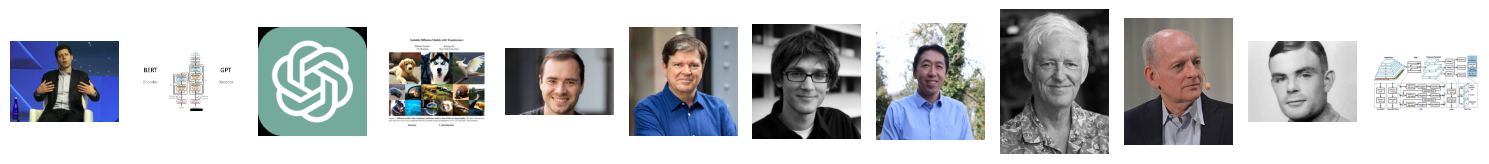

In [38]:

from PIL import Image


def open_images():
    image_list = []
    for filename in os.listdir('data/images'):
        image = Image.open('data/images/{}'.format(filename)).convert("RGB")
        image_list.append(image)

    return image_list


img_list = open_images()
_, ax = plt.subplots(1, len(img_list), figsize=(15, 5))
for index, img in enumerate(img_list):
    if img.mode == 'L':
        ax[index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[index].imshow(img, vmin=0, vmax=255)
    ax[index].axis('off')

plt.tight_layout()
plt.show()

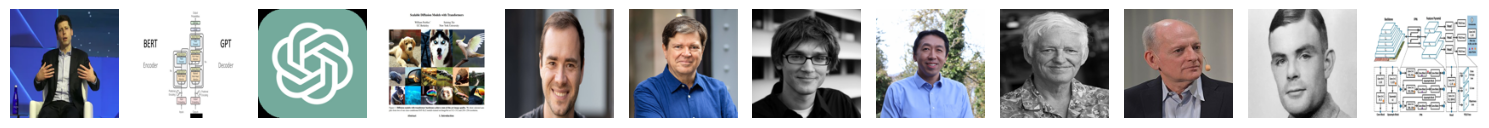

In [39]:
img_list = open_images()
new_list = []
for img in img_list:
    img_new = img.resize((128, 128))
    new_list.append(img_new)

img_list = new_list
_, ax = plt.subplots(1, len(img_list), figsize=(15, 5))
for index, img in enumerate(img_list):
    if img.mode == 'L':
        ax[index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[index].imshow(img, vmin=0, vmax=255)
    ax[index].axis('off')

plt.tight_layout()
plt.show()

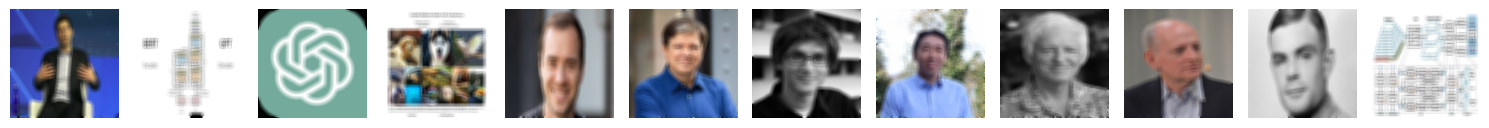

In [40]:
from PIL import ImageFilter

img_list = open_images()
new_list = []
for img in img_list:
    img_new = img.resize((128, 128))
    img_new = img_new.filter(ImageFilter.BLUR)
    new_list.append(img_new)

img_list = new_list
_, ax = plt.subplots(1, len(img_list), figsize=(15, 5))
for index, img in enumerate(img_list):
    if img.mode == 'L':
        ax[index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[index].imshow(img, vmin=0, vmax=255)
    ax[index].axis('off')

plt.tight_layout()
plt.show()

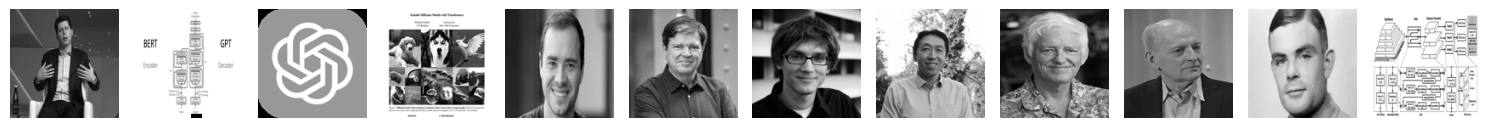

In [15]:
img_list = open_images()
new_list = []
for img in img_list:
    img_new = img.resize((128, 128))
    img_new = img_new.convert('L')
    new_list.append(img_new)

img_list = new_list
_, ax = plt.subplots(1, len(img_list), figsize=(15, 5))
for index, img in enumerate(img_list):
    if img.mode == 'L':
        ax[index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[index].imshow(img, vmin=0, vmax=255)
    ax[index].axis('off')

plt.tight_layout()
plt.show()

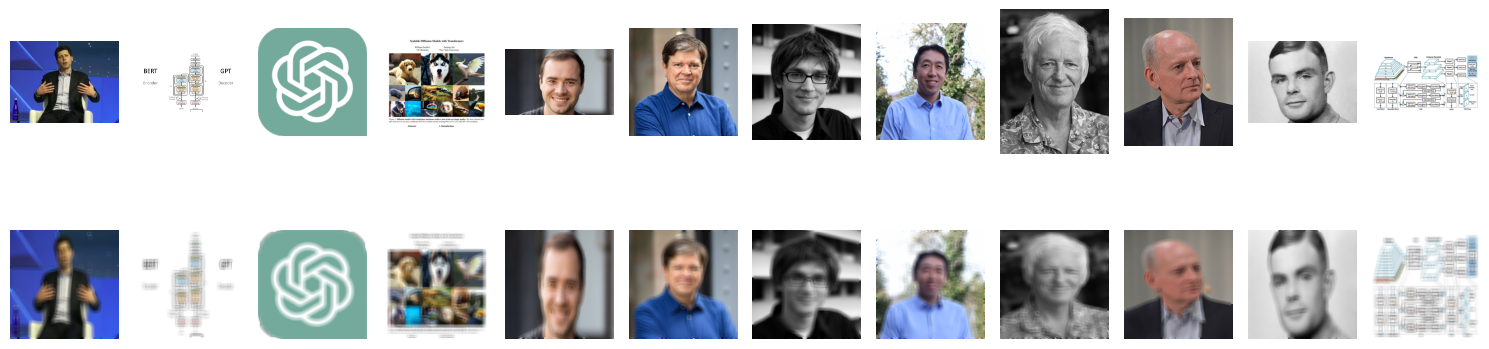

In [16]:
from PIL import ImageFilter

img_list = open_images()
new_list = []
for img in img_list:
    img_new = img.resize((128, 128))
    img_new = img_new.filter(ImageFilter.BLUR)
    new_list.append(img_new)

_, ax = plt.subplots(2, len(img_list), figsize=(15, 5))
for index, img in enumerate(img_list):
    if img.mode == 'L':
        ax[0][index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[0][index].imshow(img, vmin=0, vmax=255)
    ax[0][index].axis('off')

for index, img in enumerate(new_list):
    if img.mode == 'L':
        ax[1][index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[1][index].imshow(img, vmin=0, vmax=255)
    ax[1][index].axis('off')

plt.tight_layout()
plt.show()

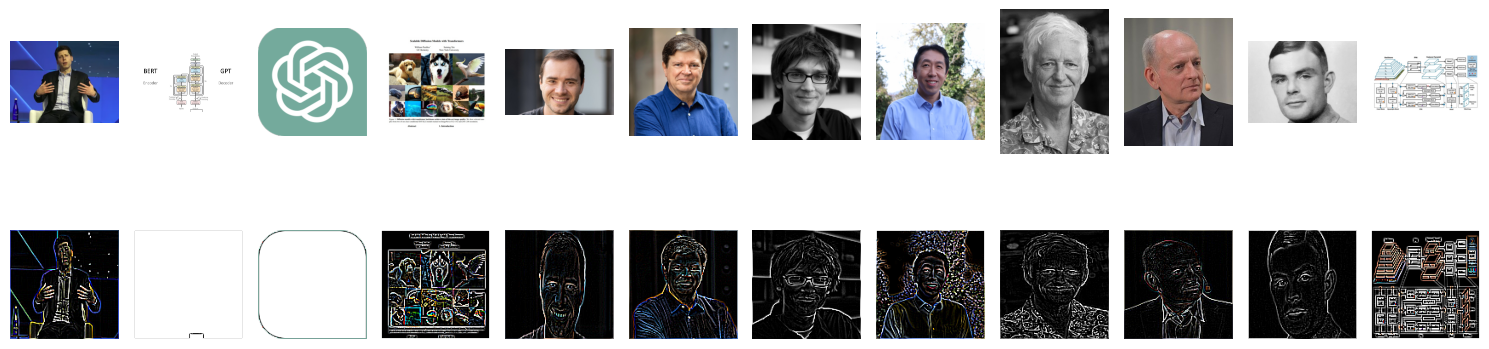

In [17]:
from PIL import ImageFilter

img_list = open_images()
new_list = []
for img in img_list:
    img_new = img.resize((128, 128))
    img_new = img_new.filter(ImageFilter.FIND_EDGES)
    new_list.append(img_new)

_, ax = plt.subplots(2, len(img_list), figsize=(15, 5))
for index, img in enumerate(img_list):
    if img.mode == 'L':
        ax[0][index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[0][index].imshow(img, vmin=0, vmax=255)
    ax[0][index].axis('off')

for index, img in enumerate(new_list):
    if img.mode == 'L':
        ax[1][index].imshow(img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[1][index].imshow(img, vmin=0, vmax=255)
    ax[1][index].axis('off')

plt.tight_layout()
plt.show()

# Normalizarea datelor

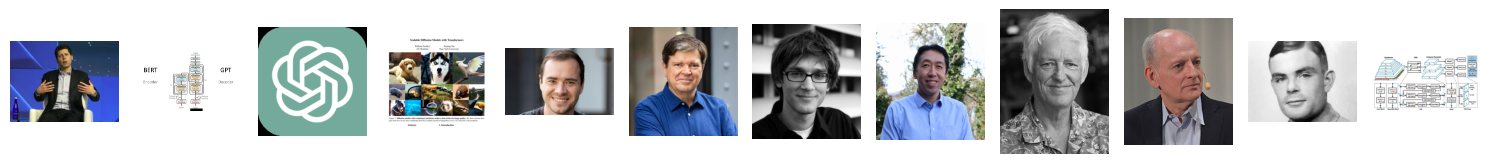

In [46]:
from PIL import ImageOps
from sklearn.preprocessing import MinMaxScaler

img_list = open_images()


def normalise_img(image):
    normalized_image = ImageOps.autocontrast(image.convert('RGB'))

    pixel_values = np.array(normalized_image)
    scaler = MinMaxScaler()
    pixel_values_normalized = scaler.fit_transform(pixel_values.reshape(-1, 1))
    
    normalized_image = Image.fromarray((pixel_values_normalized * 255).astype(np.uint8).reshape(pixel_values.shape))
    return normalized_image

normalised_list = [normalise_img(img) for img in img_list]
_, ax = plt.subplots(1, len(normalised_list), figsize=(15, 5))
for index, img in enumerate(normalised_list):
    norm_img = normalise_img(img)
    if img.mode == 'L':
        ax[index].imshow(norm_img, cmap='gray', vmin=0, vmax=255)
    else:
        ax[index].imshow(norm_img, vmin=0, vmax=255)
    ax[index].axis('off')

plt.tight_layout()
plt.show()

# Problema 3

In [26]:
from nltk.corpus import wordnet
import spacy
import rowordnet
from googletrans import Translator
import re

translator = Translator()
nlp = spacy.load('ro_core_news_sm')
wn = rowordnet.RoWordNet()

text = open('data/texts.txt', 'r', encoding='utf-8').read()
a = nlp(text)
print("Numarul de propozitii este: {}".format(len(list(a.sents))))
num_words = sum(1 for token in a if token.is_alpha)
print("Numarul de cuvinte este: {}".format(num_words))
unique_words = set([token.text for token in a if token.is_alpha])
print("Numarul de cuvinte unice este: {}".format(len(unique_words)))
longest_word = ""
index_longest_word = 0
for index, token in enumerate(a):
    if token.is_alpha:
        if len(token.text) > len(longest_word):
            longest_word = token.text
            index_longest_word = index
shortest_word = min([token.text for token in a if token.is_alpha], key=len)
print("Cuvantul cel mai lung este: {}".format(longest_word))
print("Cuvantul cel mai scurt este: {}".format(shortest_word))
lemma = a[index_longest_word].lemma_
print("Lema cuvantului cel mai lung este: {}".format(lemma))
translation = translator.translate(lemma, src='ro', dest='en')
print("Traducerea cuvantului cel mai lung este: {}".format(translation.text))
synonyns = []
for syn in wordnet.synsets(translation.text):
    for l in syn.lemmas():
        synonyns.append(re.sub(r'[-_]', ' ', l.name()))
for index in range(len(synonyns)):
    synonyns[index] = translator.translate(synonyns[index], src='en', dest='ro').text
print("Sinonimele cuvantului cel mai lung sunt: {}".format(set(synonyns)))

Numarul de propozitii este: 10
Numarul de cuvinte este: 159
Numarul de cuvinte unice este: 97
Cuvantul cel mai lung este: laboratoarele
Cuvantul cel mai scurt este: o
Lema cuvantului cel mai lung este: laborator
Traducerea cuvantului cel mai lung este: laboratory
Sinonimele cuvantului cel mai lung sunt: {'Laboratorul de cercetare', 'Testarea terenului', 'Laborator de știință', 'laborator', 'laborator de cercetare'}


# Normalizarea datelor

In [27]:
from collections import Counter

nr = len([token.text for token in a if token.is_alpha])
d = Counter([token.text for token in a if token.is_alpha])
t = [x for x in a.sents]
for key in d.keys():
    d[key] = d[key] / nr
print(d)

Counter({'de': 0.050314465408805034, 'să': 0.0440251572327044, 'și': 0.031446540880503145, 'Inteligență': 0.018867924528301886, 'Artificială': 0.018867924528301886, 'o': 0.018867924528301886, 'pentru': 0.018867924528301886, 'că': 0.018867924528301886, 'în': 0.018867924528301886, 'canalul': 0.018867924528301886, 'general': 0.018867924528301886, 'vă': 0.018867924528301886, 'Mesaj': 0.012578616352201259, 'informare': 0.012578616352201259, 'Cursul': 0.012578616352201259, 'laboratoarele': 0.012578616352201259, 'fi': 0.012578616352201259, 'provocare': 0.012578616352201259, 'Suntem': 0.012578616352201259, 'convinși': 0.012578616352201259, 'veți': 0.012578616352201259, 'realiza': 0.012578616352201259, 'proiecte': 0.012578616352201259, 'interesante': 0.012578616352201259, 'Vă': 0.012578616352201259, 'încurajăm': 0.012578616352201259, 'adresați': 0.012578616352201259, 'întrebări': 0.012578616352201259, 'atunci': 0.012578616352201259, 'când': 0.012578616352201259, 'ceva': 0.012578616352201259, 'n